<a href="https://colab.research.google.com/github/Ketan-Kapse/PneumoniaTypeClassifier/blob/main/VIRAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRE-REQUISITES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/DATASET2", output="outp5", seed=1337, ratio=(0.8, 0.1, .1),group_prefix=None) 

Copying files: 430 files [02:11,  3.27 files/s]


IMPORTING LIBRARIES

In [ ]:
import tensorflow as tf                                             
import numpy as np                                                  
import argparse
import cv2
from google.colab.patches import cv2_imshow
import os                                                
import matplotlib.pyplot as plt

from PIL import Image
from glob import glob
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D, Dropout,Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
#from tensorflow.keras.applications import decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


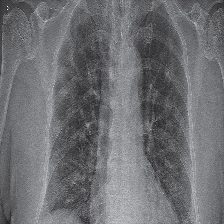

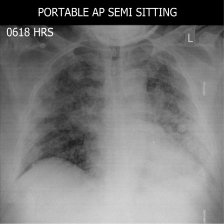

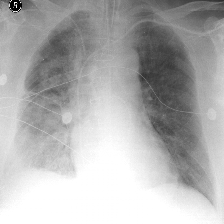

In [ ]:
img_path="/content/drive/MyDrive/model 2 dataset/COVID/1-s2.0-S0140673620303706-fx1_lrg.jpg"
img=cv2.imread(img_path)
img=cv2.resize(img,(224,224))
cv2_imshow(img)

img_path="/content/drive/MyDrive/model 2 dataset/MERS/1-s2.0-S0378603X1500248X-gr2c.jpg"
img=cv2.imread(img_path)
img=cv2.resize(img, (224,224))
cv2_imshow(img)

img_path="/content/drive/MyDrive/model 2 dataset/SARS/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg"
img=cv2.imread(img_path)
img=cv2.resize(img, (224,224))
cv2_imshow(img)

In [ ]:
image_size = [224, 224]

train = '/content/outp5/train'
valid = '/content/outp5/val'

NEURAL NETWORK

In [ ]:


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

DATA AUGMENTATION 

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.05,
                                   zoom_range = 0.05,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip = True,
                                   rotation_range=15,
                                   fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode='categorical')
training_set.class_indices


Found 342 images belonging to 3 classes.


{'COVID': 0, 'MERS': 1, 'SARS': 2}

In [ ]:
test_set = test_datagen.flow_from_directory(valid,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode='categorical')
test_set.class_indices

Found 42 images belonging to 3 classes.


{'COVID': 0, 'MERS': 1, 'SARS': 2}

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, verbose=1, cooldown=3, mode='auto', min_delta=0.01)
checkpoint= tf.keras.callbacks.ModelCheckpoint(
    filepath='/outp3',
    monitor='accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None
)

TRAINING THE MODEL

In [ ]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
 callbacks=[reduce_lr, checkpoint]
  
)

Epoch 1/100
11/11 [==============================] - 45s 1s/step - loss: 1.2024 - accuracy: 0.3596 - val_loss: 1.0961 - val_accuracy: 0.6190

Epoch 00001: accuracy improved from -inf to 0.35965, saving model to /outp3
INFO:tensorflow:Assets written to: /outp3/assets
Epoch 2/100
11/11 [==============================] - 11s 996ms/step - loss: 1.0670 - accuracy: 0.4240 - val_loss: 1.0363 - val_accuracy: 0.5476

Epoch 00002: accuracy improved from 0.35965 to 0.42398, saving model to /outp3
INFO:tensorflow:Assets written to: /outp3/assets
Epoch 3/100
11/11 [==============================] - 11s 967ms/step - loss: 0.9354 - accuracy: 0.5029 - val_loss: 0.7524 - val_accuracy: 0.6190

Epoch 00003: accuracy improved from 0.42398 to 0.50292, saving model to /outp3
INFO:tensorflow:Assets written to: /outp3/assets
Epoch 4/100
11/11 [==============================] - 11s 1s/step - loss: 0.7792 - accuracy: 0.5965 - val_loss: 0.6759 - val_accuracy: 0.6905

Epoch 00004: accuracy improved from 0.50292 t

VISUALIZATION

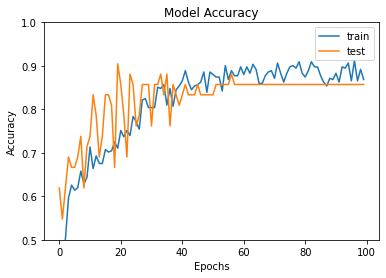

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.ylim([0.5,1])
plt.show()

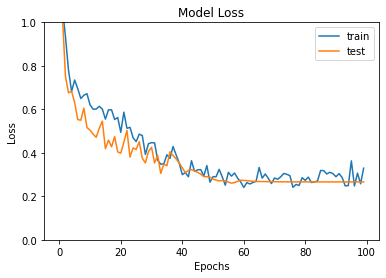

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.ylim(0.0,1)
plt.show()

GRAD CAM IMPLEMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils

import imutils

In [ ]:
orig = cv2.imread("/content/outp5/val/COVID/1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg")
resized = cv2.resize(orig, (224, 224))

image = load_img("/content/outp5/val/COVID/1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg", target_size=(224, 224))
image = img_to_array(image)
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

In [ ]:
preds = model.predict(image)
i = np.argmax(preds[0])

In [ ]:
print(i)

0


GRAD CAM ALGORITHM

In [ ]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):

        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):

        for layer in reversed(self.model.layers):
            if len(layer.output.shape) == 4:
                return layer.name

        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])


        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        grads = tape.gradient(loss, convOutputs)
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        return (heatmap, output)

VIRAL MODEL GRAD CAM VISUALIZATION

In [ ]:
icam = GradCAM(model, i) 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (224, 224))

image = cv2.imread('/content/outp5/val/COVID/1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg')
image = cv2.resize(image, (224, 224))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

(224, 224) (224, 224, 3)


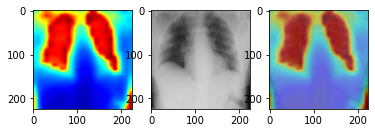

In [ ]:
fig, ax = plt.subplots(1, 3)

ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[2].imshow(output)

In [ ]:
model.save('saved_model/trained.h5', save_format='h5')

In [ ]:
from tensorflow.keras.models import load_model

BACTERIAL MODEL GRAD CAM VISUALIZATION

In [ ]:
loadmd=load_model('saved_model/trained1.h5', compile=True)

In [ ]:
orig = cv2.imread("/content/drive/MyDrive/Bacterial_pneumonia/test/BACTERIA/person582_bacteria_2404.jpeg")
resized = cv2.resize(orig, (224, 224))

image = load_img("/content/drive/MyDrive/Bacterial_pneumonia/test/BACTERIA/person582_bacteria_2404.jpeg", target_size=(224, 224))
image = img_to_array(image)
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

In [ ]:
preds = loadmd.predict(image)
i = np.argmax(preds[0])

In [ ]:
icam = GradCAM(loadmd, i) 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (224, 224))

image = cv2.imread('/content/drive/MyDrive/Bacterial_pneumonia/test/BACTERIA/person582_bacteria_2404.jpeg')
image = cv2.resize(image, (224, 224))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

(224, 224) (224, 224, 3)


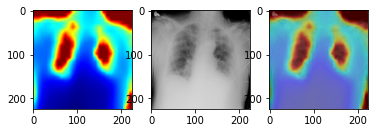

In [ ]:
fig, ax = plt.subplots(1, 3)

ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[2].imshow(output)

In [ ]:
print(i)
print(preds)

0
[[9.9984515e-01 5.9181148e-05 9.5542826e-05]]
